# **Spam Screening: Preventing Spamming in Daily Activity Reports at BPKP**  

## Created by:  

Delta Team:  
* Aditya Kurniawan W  
* Ardhani Yudistari  
* Gesang Cholinaning Verdani  

## **BUSINESS PROBLEM UNDERSTANDING**

* Sebagai dampak terjadinya pandemi COVID-19, BPKP mewajibkan pegawai untuk melakukan presensi melalui aplikasi Manajemen Aparatur BPKP (MAP). Laporan ini digunakan sebagai sarana pemantauan kegiatan kerja pegawai oleh atasan.
* Idealnya, kegiatan yang dilaporkan oleh pegawai mampu mencerminkan tugas pokok dan fungsi serta penugasan yang dilakukan

* Laporan harian yang tepat dan akurat diharapkan dapat membantu  menggambarkan ketercapaian KPI individu dan organisasi 
* Lebih jauh, hal ini dapat membantu sistem **Performance Management** yang ingin dikembangkan dengan lebih baik dan objektif di BPKP. 

* Untuk memastikan setiap pegawai mengisi laporan harian, kewajiban ini dilekatkan pada kebutuhan pegawai untuk melakukan presensi. Artinya, tanpa pengisian laporan aktivitas harian, pegawai tidak dapat melakukan presensi pulang. 

* Tim menemukan bahwa dari sebanyak 40.000 sampel acak yang diambil, sekitar 6% diantaranya belum mengisi laporan aktivitas harian dengan baik. Hal ini tercermin dari uraian kegiatan yang sulit untuk dibaca dan diinterpretasikan.


### Problem Statement:  

* Aplikasi laporan harian di BPKP belum memiliki mekanisme filtrasi. Hal ini membuat pegawai bebas mengisi apa saja meskipun data tersebut tidak bermakna (berbentuk *spam*) 
* Apabila laporan harian berbentuk *spam*, data yang dikumpulkan oleh BPKP yang seharusnya mencerminkan kinerja pegawai dapat mengandung data sampah (*garbage*)    

**Garbage in garbage out**  

* Data *spam* tidak akan berguna untuk *decision making* dan hanya menambah *sampah data* saja.

**Pegawai perlu diberikan suatu `batasan/restriction` untuk tidak sembarang menginput data.**

* Project ini dimaksudkan untuk memberikan masukan agar aplikasi laporan harian dapat membedakan data *spam* dari data *ham* sehingga saat pegawai meng-*input* data terindikasi *spam*, akan ada *warning* sebagai tindakan *preventif*.
* Tim juga ingin mengidentifikasi variabel/feature/atribut apa saja yang dapat menjadi indikator *input spamming* ini. Indikator tersebut juga bisa menjadi bahan rekomendasi perbaikan sistem di masa yang akan datang.


### Context

1: Input berupa spam  
0: Input berupa ham/non spam


### Analytical Approach:  

1. Menemukan pola data yang terindikasi *spam*
2. Melakukan klasifikasi atas data *spam* dan *ham*  
   * Tim bermaksud untuk melakukan analisis data eksploratori untuk melakukan tagging atas input yang dilakukan pegawai BPKP pada aktivitas harian yang dilakukan dengan pendekatan text mining.
   * Dari hasil tagging di atas, tim akan melakukan prediksi pada data test untuk melihat apakah suatu input terkategori *spamming* atau tidak.
3. Membangun model klasifikasi untuk membantu memprediksi *input spam* dalam rangka tindak preventif dengan menggunakan beberapa fitur berikut:
    * Length = Panjang karakter
    * Status wfh = Menunjukkan status kerja pegawai yang terbagi menjadi 3 kategori: WFO (work from office), WFH (work from home) dan DL (dinas luar)
    * stopwords = Jumlah stopwords pada input aktivitas harian
    * Tanda baca (Punctuation) = Jumlah tanda baca pada input aktivitas harian
    * Punctuation ratio = Perbandingan jumlah tanda baca dengan panjang kararkter input aktivitas harian
    * Stopwords ratio = Perbandingan jumlah stopwords dengan panjang kararkter input aktivitas harian
    * TF-IDF aktivitas harian = Feature berupa vector dari kolom aktivitas harian


### Goal:

* Membedakan input spam dan non spam
* Mencegah pegawai untuk menuliskan laporan harian spam  

### Impact:  

* Atasan dapat memantau pekerjaan yang dilakukan bawahan, bahkan meskipun keduanya tidak berada di tempat yang sama
* (tbd) Menjadi feature untuk menciptakan sistem **Performance Management** yang lebih objektif dan akurat

### Metric Evaluation

| Metric Evaluation | Predicted (-) | Predicted (+) |
| :-: | :-: | :-: |
|Actual (-) |Model predicts ham as ham   | Model Predicts ham as spam |  
| Actual (+) | Model predicts spam as ham | Model predicts spam as spam |


**Type 1 error:**  
False Positive: *Data non spam dianggap spam*  
Konsekuensi: Pegawai butuh waktu lebih lama untuk menulis laporan harian

**Type 2 error:**
False Negative: *Data spam dianggap non spam*
Konsekuensi: Atasan tidak dapat mengidentifikasi tugas bawahan  

Dari sudut pandang konsekuensi, maka prioritas yang dilakukan adalah membuat model yang dapat mengidentifikasi spam dengan seakurat mungkin tanpa membuat pegawai terdemotivasi untuk mengisi dengan baik dan lengkap. Atau, dengan kata lain, fokus pengendalian adalah pada type 2 error atau meningkatkan skor metric **recall**.  

Namun demikian, tim mempertimbangkan ketidakseimbangan jumlah unit analisis (*imbalance classification*) label 0 dan 1, dimana unit analisis 1 jumlahnya jauh lebih kecil dengan perbandingan sekitar 3:50. Sehingga, untuk menyeimbangkan, metric **F1-score** menjadi fokus utama secara keseluruhan. 

## Data Understanding  

Dataset source: Aplikasi MAP Laporan Harian BPKP  
Hal-hal yang harus diperhatikan:  
* Dataset tidak seimbang (jumlah kelas 1 dan 0 berbeda jauh dengan perbandingan sekitar 3:50)
* Sebagian besar fitur awal bersifat kategori index 
* Setiap *row data* merepresentasikan `unit analisis` data kegiatan harian yang dilakukan oleh pegawai.

## Attribute Information  

Berikut adalah atribut-atribut yang terdapat dalam dataframe yang dianalisis:

| Attribute | Data Type, Length | Description|
| :- | :-: | :-: |
| id | int | Unique employee ID identifier |
| aktivitas_harian | object | Data aktivitas harian fokus utama analisis |
| status_wfh| int64 | Status kerja wfh/wfo/dinas luar |
| isspam | int64 | Label spam (1) dan ham (0) |
| panjang_kata | int64 | Panjang karakter input aktivitas harian |
| stopwords | int 64 | Jumlah stopwords pada input aktivitas harian |
| punct_count | int64 | Jumlah tanda baca pada input aktivitas harian |
| PRS | float | Perbandingan jumlah tanda baca dengan panjang kararkter input aktivitas harian |
| SRS | float | Perbandingan jumlah stopwords dengan panjang kararkter input aktivitas harian |
| TF-IDF aktivitas harian | int64 | Vector input aktivitas harian |   


## Feature
Fitur yang digunakan sebagai dasar analisis adalah klasifikasi dengan:  

Y = kolom isspam (membedakan kelas spam dan ham)  
X = Feature yang digunakan:  
* panjang_kata menunjukkan panjang kata pada kolom nama_aktivitas;
* `status_wfh` menunjukkan status kerja pegawai;
* stopwords menunjukkan jumlah stopwords pada input aktivitas harian
* punct_count menunjukkan jumlah tanda baca pada input aktivitas harian
* PRS menunjukkan perbandingan jumlah tanda baca dengan panjang kararkter input aktivitas harian
* SRS menunjukkan perbandingan jumlah stopwords dengan panjang kararkter input aktivitas harian
* TF-IDF aktivitas harian menunjukkan vector input aktivitas harian     

In [64]:
# Langkah untuk penggunaan notebook iMac

import collections.abc
collections.Iterable = collections.abc.Iterable
collections.Mapping = collections.abc.Mapping
collections.MutableSet = collections.abc.MutableSet
collections.MutableMapping = collections.abc.MutableMapping
collections.Sequence = collections.abc.Sequence
from collections.abc import Sequence

# Import Library

In [65]:
# import basic library 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

# Data Preprocessing  

Project ini menggunakan gabungan dari dua dataframe yaitu:  
1. Data Aktivitas Harian  
   Data sebanyak 1.146.372 row dari aktivitas harian aplikasi MAP BPKP  
2. Data Jabatan  
   Data sebanyak 14.447 row yang menunjukkan jabatan-jabatan yang ada di BPKP. Penggunaan dataframe ini bertujuan untuk memfilter kegiatan yang menjadi `focal point` project ini yaitu kegiatan auditor

In [66]:
df1 = pd.read_csv('aktivitas_harian_2.csv',
                 lineterminator='\n',
                 low_memory=False)
df2 = pd.read_csv('peg_jab.csv')
pd.set_option('display.max_columns', None)
display (df1, df2)

,id,niplama,nama_aktivitas,key_sort_unit,atasan1,atasan2,atasan3,tanggal_aktivitas,kd_proses,id_sasaran,id_sub_sasaran,status_wfh,created_at,updated_at,niplama_atasan,nama_atasan,jabatan_atasan,namaunit_atasan,lat,long,sumber_lokasi,nama_sasaran_kinerja,nama_sasaran_singkat,nama_subsasaran_kinerja,nama_subsasaran_singkat,lingkup
0,1894200,740005973,Menyelesaikan pelaporan dan kka,7001500105600099,230307001500105600230,220107001500105600001,220107001500105600001,2021-12-31,0,3.0,8.0,0,2021-12-31 23:47:46,2021-12-31 23:47:46,740005934.0,Abdul Karim,Auditor Madya selaku Koordinator Pengawasan Ke...,Perwakilan BPKP Provinsi Kalimantan Tengah,-2.218193593761288,113.915455,Mobile,Meningkatnya Akuntabilitas Tata Kelola Badan U...,Akuntabilitas Tata Kelola Badan Usaha,Jumlah BUMN dengan Akuntabilitas Tata Kelola K...,Akuntabilitas Tata Kelola Korporasi,Kedeputian & Perwakilan
1,1894196,740003513,Penyusunan usulan RKT 2022,7001500105000099,220107001500105000001,210107001500001600001,210107001500000000001,2021-12-31,0,3.0,8.0,0,2021-12-31 23:29:05,2021-12-31 23:29:05,740002183.0,Yunaedi,Kepala Perwakilan BPKP Provinsi Maluku,Perwakilan BPKP Provinsi Maluku,-3.6968631,128.175251,Mobile,Meningkatnya Akuntabilitas Tata Kelola Badan U...,Akuntabilitas Tata Kelola Badan Usaha,Jumlah BUMN dengan Akuntabilitas Tata Kelola K...,Akuntabilitas Tata Kelola Korporasi,Kedeputian & Perwakilan
2,1894172,740000616,Melakukan asesmen gcg pada pt rni tahun 2021,7001500001600099,230107001500001600030,220107001500001600006,210107001500001600001,2021-12-31,0,3.0,8.0,1,2021-12-31 22:36:24,2021-12-31 22:36:24,740003344.0,Mulyanto,Auditor Madya selaku Koordinator Pengawasan Ba...,Deputi Bidang Akuntan Negara,-6.4191248,106.822427,Mobile,Meningkatnya Akuntabilitas Tata Kelola Badan U...,Akuntabilitas Tata Kelola Badan Usaha,Jumlah BUMN dengan Akuntabilitas Tata Kelola K...,Akuntabilitas Tata Kelola Korporasi,Kedeputian & Perwakilan
3,1894152,740003218,Reviu atas Proses Alih Bisnis Gas pada PT Pert...,7001500001600099,230107001500001600039,220107001500001600009,210107001500001600001,2021-12-31,0,3.0,8.0,1,2021-12-31 21:59:55,2021-12-31 21:59:55,740005994.0,Sapto Prabowo,Auditor Madya selaku Koordinator Pengawasan Ba...,Deputi Bidang Akuntan Negara,-6.3357775,106.962887,Mobile,Meningkatnya Akuntabilitas Tata Kelola Badan U...,Akuntabilitas Tata Kelola Badan Usaha,Jumlah BUMN dengan Akuntabilitas Tata Kelola K...,Akuntabilitas Tata Kelola Korporasi,Kedeputian & Perwakilan
4,1894149,740004455,Reviu FS PDAM Tirta Deli,7001500102800099,230307001500102800232,220107001500102800001,220107001500102800001,2021-12-31,0,3.0,8.0,0,2021-12-31 21:49:12,2021-12-31 21:49:12,740002161.0,Susetyo Gigih Trilaksono,Auditor Madya selaku Koordinator Pengawasan Ke...,Perwakilan BPKP Provinsi Sumatera Utara,3.6057039,98.628124,Mobile,Meningkatnya Akuntabilitas Tata Kelola Badan U...,Akuntabilitas Tata Kelola Badan Usaha,Jumlah BUMN dengan Akuntabilitas Tata Kelola K...,Akuntabilitas Tata Kelola Korporasi,Kedeputian & Perwakilan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146367,751971,740006267,Finalisasi draft Pedoman Penilaian Maturitas SPIP,7001500002000099,230107001500002000001,220107001500002000001,220107001500002000001,2021-01-05,0,12.0,47.0,0,2021-01-05 20:42:12,2022-08-08 11:22:18,740005278.0,Arinto Dananjaya,Peneliti Madya selaku Koordinator Penelitian P...,Pusat Penelitian dan Pengembangan Pengawasan,NaN,NaN,NaN,Meningkatnya Kinerja Fungsi Penelitian dan Pen...,Fungsi Penelitian dan Pengembangan,Menguatnya Hilirisasi Produk Unggulan Puslitba...,Hilirisasi Produk Berbasis Riset,Puslitbangwas
1146368,751403,200900068,Mencari referensi policy brief koordinasi Apip...,7001500002000099,240307001500002000001,230107001500002000001,220107001500002000001,2021-01-05,0,12.0,47.0,0,2021-01-05 17:24:08,2022-08-09 10:44:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Meningkatnya Kinerja Fungsi Penelitian dan Pen...,Fungsi Penelitian dan Pengemb

,niplama,nama,jabatan,namaunit_lengkap
0,60066442,Haryono,Wakil Ketua 1 Komisi Pemberantasan Korupsi,Biro Sumber Daya Manusia
1,740001295,Darmili,Bupati Simeuleu,Perwakilan BPKP Aceh
2,60013382,Mohammad Ghazali Latief,NaN,Ropeg DPL
3,60006025,I Gusti Putu Surya,NaN,Ropeg DPL
4,60061683,Wiharto,NaN,Ropeg DPL
...,...,...,...,...
14442,60014906,Disumadi,NaN,NaN
14443,60063033,Djaja Setia,NaN,NaN
14444,60016483,Djemakun,NaN,NaN
14445,200000005,Djuangsih,NaN,NaN


## Data Integration  
* Menggabungkan data aktivitas harian dengan data jabatan (dengan tujuan untuk memfilter data pejabat fungsional auditor dan tidak menyertakan data non-auditor) menggunakan `join`
* Hasil akhir yang diperoleh adalah sebanyak 762.196 row data.

In [67]:
from pandasql import sqldf

join_table = lambda q: sqldf(q, globals())

In [68]:
join_jab= '''
    select
        df1.*, df2.jabatan as jabatan
    from df1
    join df2
    on
        df1.niplama = df2.niplama
    where df2.jabatan like '%auditor%'
'''

df = join_table(join_jab)
df

,id,niplama,nama_aktivitas,key_sort_unit,atasan1,atasan2,atasan3,tanggal_aktivitas,kd_proses,id_sasaran,id_sub_sasaran,status_wfh,created_at,updated_at,niplama_atasan,nama_atasan,jabatan_atasan,namaunit_atasan,lat,long,sumber_lokasi,nama_sasaran_kinerja,nama_sasaran_singkat,nama_subsasaran_kinerja,nama_subsasaran_singkat,lingkup,jabatan
0,744251,740005013,Mengkoornidir perencanaan tahun 2021,7001500104500099,210107001500001600001,210107001500000000001,210107001500000000001,2021-01-04,0,6.0,15.0,0,2021-01-04 06:25:13,2021-01-04 06:25:13,740002162.0,Sally Salamah,Deputi Kepala BPKP Bidang Akuntan Negara,Deputi Bidang Akuntan Negara,None,NaN,None,Meningkatnya Kinerja Fungsi Tata Kelola,Fungsi Tata Kelola,"Tersedianya Perencanaan yang Spesifik, Terukur...",Perencanaan,Biro MKOT & Seluruh Unit,Kepala Pusat Pembinaan Jabatan Fungsional Auditor
1,749710,740005013,Mereviu laporan penyelenggaraan pembinaan SPIP...,7001500104500099,230107001500001100005,210107001500000000001,210107001500000000001,2021-01-05,0,5.0,13.0,0,2021-01-05 16:14:47,2021-01-05 16:14:47,60034067.0,Gatot Wibisono,Kepala Bagian Pemindahan dan Pemberhentian Peg...,None,None,NaN,None,Meningkatnya Kualitas Pengendalian K/L/Pemda,Pengendalian K/L/Pemda,Persentase K/L/Pemda dengan Indeks Maturitas S...,Maturitas SPIP K/L/Pemda,Kedeputian & Perwakilan,Kepala Pusat Pembinaan Jabatan Fungsional Auditor
2,752769,740005013,Mereviu laporan kinerja Perwakilan,7001500104500099,230107001500001100005,210107001500000000001,210107001500000000001,2021-01-06,0,6.0,17.0,0,2021-01-06 11:15:56,2021-01-06 11:15:56,60034067.0,Gatot Wibisono,Kepala Bagian Pemindahan dan Pemberhentian Peg...,None,None,NaN,None,Meningkatnya Kinerja Fungsi Tata Kelola,Fungsi Tata Kelola,Nilai SAKIP BPKP yang Tercapai Sesuai Target,SAKIP BPKP,Biro MKOT & Seluruh Unit,Kepala Pusat Pembinaan Jabatan Fungsional Auditor
3,756367,740005013,Melakukan koordinasi pengawasan dng gubernur NTT,7001500104500099,210107001500001600001,210107001500000000001,210107001500000000001,2021-01-07,0,5.0,13.0,0,2021-01-07 06:17:39,2021-01-07 06:17:39,740002162.0,Sally Salamah,Deputi Kepala BPKP Bidang Akuntan Negara,Deputi Bidang Akuntan Negara,None,NaN,None,Meningkatnya Kualitas Pengendalian K/L/Pemda,Pengendalian K/L/Pemda,Persentase K/L/Pemda dengan Indeks Maturitas S...,Maturitas SPIP K/L/Pemda,Kedeputian & Perwakilan,Kepala Pusat Pembinaan Jabatan Fungsional Auditor
4,771014,740005013,Mengkoodinir rapat kerja perencanaan 2021,7001500002200099,210107001500001600001,210107001500000000001,210107001500000000001,2021-01-11,0,6.0,15.0,0,2021-01-11 19:06:57,2021-01-11 19:06:57,740002162.0,Sally Salamah,Deputi Kepala BPKP Bidang Akuntan Negara,Deputi Bidang Akuntan Negara,None,NaN,None,Meningkatnya Kinerja Fungsi Tata Kelola,Fungsi Tata Kelola,"Tersedianya Perencanaan yang Spesifik, Terukur...",Perencanaan,Biro MKOT & Seluruh Unit,Kepala Pusat Pembinaan Jabatan Fungsional Auditor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762191,1536525,201800064,Laptri triwulan ii,7001500104600099,230307001500104600221,220107001500104600001,220107001500104600001,2021-09-01,0,6.0,15.0,1,2021-09-01 18:51:57,2021-09-01 18:51:57,740001529.0,Udoyo Hari Wirawan,Auditor Madya selaku Koordinator Pengawasan Ke...,Perwakilan BPKP Provinsi Sulawesi Selatan,-7.3682436,112.713624,Mobile,Meningkatnya Kinerja Fungsi Tata Kelola,Fungsi Tata Kelola,"Tersedianya Perencanaan yang Spesifik, Terukur...",Perencanaan,Biro MKOT & Seluruh Unit,Auditor dalam Pembebasan Sementara
762192,1541113,201800064,Laptri triwulan ii,7001500104600099,230307001500104600221,220107001500104600001,220107001500104600001,2021-09-02,0,6.0,15.0,1,2021-09-02 21:32:18,2021-09-02 21:32:18,740001529.0,Udoyo Hari Wirawan,Auditor Madya selaku Koordinator Pengawasan Ke...,Perwakilan BPKP Provinsi Sulawesi Selatan,-7.370373,112.712419,Mobile,Meningkatnya Kinerja Fungsi Tata Kelola,Fungsi Tata Kelola,"Tersedianya Perencanaan yang Spesifik,

## Data cleaning (Tahap 1)
### *Remove duplicate*  
* Penghapusan row yang memiliki duplikasi data pada kolom `nama_aktivitas`. Hal ini dilakukan karena terdapat tendensi pegawai menduplikasi input laporan yang dilakukan tiap harinya selama berada dalam ST yang sama
* Setelah dihapus, tersisa sebanyak 275.336 rows

In [69]:
df = df.drop_duplicates(subset=['nama_aktivitas'])
df = df.reset_index()
df = df.drop(columns='index',axis=1)
df

,id,niplama,nama_aktivitas,key_sort_unit,atasan1,atasan2,atasan3,tanggal_aktivitas,kd_proses,id_sasaran,id_sub_sasaran,status_wfh,created_at,updated_at,niplama_atasan,nama_atasan,jabatan_atasan,namaunit_atasan,lat,long,sumber_lokasi,nama_sasaran_kinerja,nama_sasaran_singkat,nama_subsasaran_kinerja,nama_subsasaran_singkat,lingkup,jabatan
0,744251,740005013,Mengkoornidir perencanaan tahun 2021,7001500104500099,210107001500001600001,210107001500000000001,210107001500000000001,2021-01-04,0,6.0,15.0,0,2021-01-04 06:25:13,2021-01-04 06:25:13,740002162.0,Sally Salamah,Deputi Kepala BPKP Bidang Akuntan Negara,Deputi Bidang Akuntan Negara,None,NaN,None,Meningkatnya Kinerja Fungsi Tata Kelola,Fungsi Tata Kelola,"Tersedianya Perencanaan yang Spesifik, Terukur...",Perencanaan,Biro MKOT & Seluruh Unit,Kepala Pusat Pembinaan Jabatan Fungsional Auditor
1,749710,740005013,Mereviu laporan penyelenggaraan pembinaan SPIP...,7001500104500099,230107001500001100005,210107001500000000001,210107001500000000001,2021-01-05,0,5.0,13.0,0,2021-01-05 16:14:47,2021-01-05 16:14:47,60034067.0,Gatot Wibisono,Kepala Bagian Pemindahan dan Pemberhentian Peg...,None,None,NaN,None,Meningkatnya Kualitas Pengendalian K/L/Pemda,Pengendalian K/L/Pemda,Persentase K/L/Pemda dengan Indeks Maturitas S...,Maturitas SPIP K/L/Pemda,Kedeputian & Perwakilan,Kepala Pusat Pembinaan Jabatan Fungsional Auditor
2,752769,740005013,Mereviu laporan kinerja Perwakilan,7001500104500099,230107001500001100005,210107001500000000001,210107001500000000001,2021-01-06,0,6.0,17.0,0,2021-01-06 11:15:56,2021-01-06 11:15:56,60034067.0,Gatot Wibisono,Kepala Bagian Pemindahan dan Pemberhentian Peg...,None,None,NaN,None,Meningkatnya Kinerja Fungsi Tata Kelola,Fungsi Tata Kelola,Nilai SAKIP BPKP yang Tercapai Sesuai Target,SAKIP BPKP,Biro MKOT & Seluruh Unit,Kepala Pusat Pembinaan Jabatan Fungsional Auditor
3,756367,740005013,Melakukan koordinasi pengawasan dng gubernur NTT,7001500104500099,210107001500001600001,210107001500000000001,210107001500000000001,2021-01-07,0,5.0,13.0,0,2021-01-07 06:17:39,2021-01-07 06:17:39,740002162.0,Sally Salamah,Deputi Kepala BPKP Bidang Akuntan Negara,Deputi Bidang Akuntan Negara,None,NaN,None,Meningkatnya Kualitas Pengendalian K/L/Pemda,Pengendalian K/L/Pemda,Persentase K/L/Pemda dengan Indeks Maturitas S...,Maturitas SPIP K/L/Pemda,Kedeputian & Perwakilan,Kepala Pusat Pembinaan Jabatan Fungsional Auditor
4,771014,740005013,Mengkoodinir rapat kerja perencanaan 2021,7001500002200099,210107001500001600001,210107001500000000001,210107001500000000001,2021-01-11,0,6.0,15.0,0,2021-01-11 19:06:57,2021-01-11 19:06:57,740002162.0,Sally Salamah,Deputi Kepala BPKP Bidang Akuntan Negara,Deputi Bidang Akuntan Negara,None,NaN,None,Meningkatnya Kinerja Fungsi Tata Kelola,Fungsi Tata Kelola,"Tersedianya Perencanaan yang Spesifik, Terukur...",Perencanaan,Biro MKOT & Seluruh Unit,Kepala Pusat Pembinaan Jabatan Fungsional Auditor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275331,1160456,201800064,Evren Kab. MAROS,7001500104600099,230307001500104600221,220107001500104600001,220107001500104600001,2021-05-03,0,6.0,15.0,2,2021-05-03 14:06:57,2021-05-03 14:06:57,740001529.0,Udoyo Hari Wirawan,Auditor Madya selaku Koordinator Pengawasan Ke...,Perwakilan BPKP Provinsi Sulawesi Selatan,-5.1315338,119.499806,Mobile,Meningkatnya Kinerja Fungsi Tata Kelola,Fungsi Tata Kelola,"Tersedianya Perencanaan yang Spesifik, Terukur...",Perencanaan,Biro MKOT & Seluruh Unit,Auditor dalam Pembebasan Sementara
275332,1171177,201800064,<p>Evaluasi Perencanaan Kab Maros</p>,7001500104600099,230307001500104600221,220107001500104600001,220107001500104600001,2021-05-05,0,6.0,15.0,2,2021-05-05 15:27:25,2021-05-05 15:27:25,740001529.0,Udoyo Hari Wirawan,Auditor Madya selaku Koordinator Pengawasan Ke...,Perwakilan BPKP Provinsi Sulawesi Selatan,-5.1324863,119.499713,Web,Meningkatnya Kinerja Fungsi Tata Kelola,Fungsi Tata Kelola,"Tersedianya Perencanaan

### Drop Kolom yang Tidak Digunakan  

Terdapat beberapa kolom yang tidak diperlukan sehingga akan didrop dari dataframe, yang meliputi:  
* id
* key_sort_unit
* atasan1
* atasan2
* atasan3
* kd_proses
* id_sasaran
* id_sub_sasaran
* created_at
* updated_at
* niplama_atasan
* nama_atasan
* jabatan_atasan
* namaunit_atasan
* lat
* long
* sumber_lokasi
* nama_sasaran_kinerja
* nama_sasaran_singkat
* nama_subsasaran_kinerja
* nama_subsasaran_singkat
* lingkup	

Sehingga yang tersisa hanya kolom berikut:
* niplama
* nama_aktivitas
* tanggal_aktivitas
* status_wfh
* jabatan  

In [70]:
df = df.drop(columns=['id','key_sort_unit','atasan1','atasan2','atasan3','kd_proses','id_sasaran','id_sub_sasaran','created_at','updated_at','niplama_atasan','nama_atasan','jabatan_atasan','namaunit_atasan','lat','long','sumber_lokasi','nama_sasaran_kinerja','nama_sasaran_singkat','nama_subsasaran_kinerja','nama_subsasaran_singkat','lingkup'],axis=1)
df

,niplama,nama_aktivitas,tanggal_aktivitas,status_wfh,jabatan
0,740005013,Mengkoornidir perencanaan tahun 2021,2021-01-04,0,Kepala Pusat Pembinaan Jabatan Fungsional Auditor
1,740005013,Mereviu laporan penyelenggaraan pembinaan SPIP...,2021-01-05,0,Kepala Pusat Pembinaan Jabatan Fungsional Auditor
2,740005013,Mereviu laporan kinerja Perwakilan,2021-01-06,0,Kepala Pusat Pembinaan Jabatan Fungsional Auditor
3,740005013,Melakukan koordinasi pengawasan dng gubernur NTT,2021-01-07,0,Kepala Pusat Pembinaan Jabatan Fungsional Auditor
4,740005013,Mengkoodinir rapat kerja perencanaan 2021,2021-01-11,0,Kepala Pusat Pembinaan Jabatan Fungsional Auditor
...,...,...,...,...,...
275331,201800064,Evren Kab. MAROS,2021-05-03,2,Auditor dalam Pembebasan Sementara
275332,201800064,<p>Evaluasi Perencanaan Kab Maros</p>,2021-05-05,2,Auditor dalam Pembebasan Sementara
275333,201800064,Optimalisasi Daerah Maros,2021-06-02,0,Auditor dalam Pembebasan Sementara
275334,201800064,Menyusun Laptri triwulan II,2021-07-05,0,Auditor dalam Pembebasan Sementara


## Data Reduction

Sebelum `data cleaning` dilanjutkan, untuk meringankan kinerja, tim mengambil sampel dataframe terlebih dahulu `secara Random` sebanyak 40.000 Data

In [71]:
df_sample = df.sample(n=40000, random_state=2022)
df_sample = df_sample.reset_index()
df_sample = df_sample.drop(['index'],axis=1)
df_sample.to_csv('label_sample_auditor_combine1.csv', index=False)
df_sample.to_excel('label_sample_auditor_combine1.xlsx', sheet_name='sample auditor1', index=False)

## Data Transformation

Setelah data diambil, maka dilakukan labeling secara manual untuk menentukan data aktivitas harian yang termasuk ke dalam SPAM dan NON SPAM dengan ketentuan sebagai berikut:
* `Data SPAM diberikan label 1`:  
  * Data SPAM berisikan data yang tidak memiliki makna sebagai contoh:
      * Hanya berisikan karakter (????? , __)
      * Hanya tulisan acak (abcdefg, yslkhlkh)
      * Hanya menyatakan kata kerja tanpa objek (bekerja, bekerja wfo/wfh)
      * Hanya menyatakan objek tanpa kata kerja (ST Nomor 32/SU/04/2022, APIP, Laporan, Lapgub, Lapming)
* `Data HAM diberikan label 0`: 
  * Data HAM berisikan data yang memiliki makna

| **CATATAN KHUSUS** |
| :- |
| Proses perolehan sample untuk project ini bersifat `iteratif` dengan langkah sebagai berikut:
* Data awal yang diambil adalah data aktivitas harian sebanyak 40000 sample data
    * Setelah diolah, ternyata hasil metric yang diperoleh cukup unfavorable (*less than 0.4 untuk F1score*), sehingga tim mencoba menganalisis penyebabnya
    * Dari hasil penyelidikan ditemukan bahwa terdapat inkonsistensi dalam pengisian input laporan harian. Untuk beberapa jabatan fungsional, terutama `auditor` yang menjalankan bisnis proses utama di BPKP, tugas didasarkan Surat Tugas yang secara konsisten dibuat dan dapat menjadi acuan dalam mengisi laporan harian. Namun, hal ini menjadi kesulitan bagi pegawai fungsional umum yang mengerjakan tugas pokoknya tanpa adanya arahan surat tugas, seperti:
        * Tugas harian sekretaris (mengetik, menerima telepon, sortir surat, dsb)
        * Tugas harian menyapu, mengecat, mengurus kebun, dsb
    * Berdasarkan penyelidikan di atas, tim melihat pola yang tidak teratur, sehingga data sulit diolah. Oleh karena itu, tim memutuskan untuk berfokus pada data laporan harian jabatan fungsional auditor, sehingga dari sejumlah `40000 sample data` di atas, diperoleh sebanyak 18000 data aktivitas harian khusus jabatan fungsional auditor.
* Untuk menambah data, tim kembali mengambil sample tambahan (khusus auditor) sehingga sample terakhir yang digunakan pada proses selanjutnya di bawah ini tetap sejumlah 40000 sample data. |

In [72]:
df_olah = pd.read_excel('label_sample_auditor_combine.xlsx')

`df_olah` adalah nama dataframe yang digunakan pada proses selanjutnya.

In [73]:
#drop kolom yang tidak digunakan
df_olah=df_olah.drop(columns=['key_sort_unit','kd_proses','id_sasaran','id_sub_sasaran','created_at','updated_at','jabatan_atasan','sumber_lokasi','nama_sasaran_kinerja','nama_sasaran_singkat','nama_subsasaran_kinerja','nama_subsasaran_singkat','lingkup'],axis=1)
df_olah.head()

,id,nama_aktivitas,isspam,tanggal_aktivitas,status_wfh,jabatan
0,1400595,<p>&nbsp;QA Penilaian mandiri kapabilitas SPI ...,0.0,2021-07-22,2,Auditor Muda
1,848514,Persiapan penugasan penyusunan LKPD halteng,0.0,2021-02-01,0,Auditor Pelaksana
2,1355608,<p>\n\natt pt berky\n\n<br></p>,0.0,2021-07-09,1,Auditor Muda
3,1013357,Bimtek sia BUMDes,0.0,2021-03-19,0,Auditor Madya
4,1508177,survei pendahuluan PN1PP5,0.0,2021-08-24,1,Auditor Muda


In [74]:
df_olah.isna().sum()

id                       0
nama_aktivitas           0
isspam               18587
tanggal_aktivitas        0
status_wfh               0
jabatan                  0
dtype: int64

In [75]:
# Drop data null
df_olah = df_olah.dropna(subset=['isspam'], how='all')
df_olah
#Data siap olah sejumlah 40000 data

,id,nama_aktivitas,isspam,tanggal_aktivitas,status_wfh,jabatan
0,1400595,<p>&nbsp;QA Penilaian mandiri kapabilitas SPI ...,0.0,2021-07-22,2,Auditor Muda
1,848514,Persiapan penugasan penyusunan LKPD halteng,0.0,2021-02-01,0,Auditor Pelaksana
2,1355608,<p>\n\natt pt berky\n\n<br></p>,0.0,2021-07-09,1,Auditor Muda
3,1013357,Bimtek sia BUMDes,0.0,2021-03-19,0,Auditor Madya
4,1508177,survei pendahuluan PN1PP5,0.0,2021-08-24,1,Auditor Muda
...,...,...,...,...,...,...
58582,1390725,<p>mengerjakan aktualisasi</p>,1.0,2021-07-19,1,Auditor Pelaksana
58583,1478550,<p>lomba 17an</p>,1.0,2021-08-15,0,Auditor Pelaksana
58584,915244,Bekerja keras,1.0,2021-02-19,0,Auditor dalam Pembebasan Sementara
58585,1455266,olahraga,1.0,2021-08-06,0,Auditor dalam Pembebasan Sementara


## Data cleaning  (Tahap 2)
### Remove HTML Tag  
Remove HTML Tag dengan HTML Parser (e.g.: `<p>, <a>, <body>, <head>`, dan sebagainya)

In [76]:
# !pip install HTMLParser
from io import StringIO
from html.parser import HTMLParser

In [77]:
# Membuat function untuk menghapus tag HTML
class MLStripper(HTMLParser):
    def __init__(self):
        super().__init__()
        self.reset()
        self.strict = False
        self.convert_charrefs= True
        self.text = StringIO()
    def handle_data(self, d):
        self.text.write(d)
    def get_data(self):
        return self.text.getvalue()

def strip_tags(text):
    text = str(text)
    s = MLStripper()
    s.feed(text)
    return s.get_data()

#### Hapus Strip Tags  
Menghapus strip_tags yang biasanya ada pada format HTML seperti `<p>&nbsp;`

In [78]:
df_olah['strip_tags'] = df_olah['nama_aktivitas'].apply(strip_tags)
df_olah.head()

,id,nama_aktivitas,isspam,tanggal_aktivitas,status_wfh,jabatan,strip_tags
0,1400595,<p>&nbsp;QA Penilaian mandiri kapabilitas SPI ...,0.0,2021-07-22,2,Auditor Muda,QA Penilaian mandiri kapabilitas SPI berbasis...
1,848514,Persiapan penugasan penyusunan LKPD halteng,0.0,2021-02-01,0,Auditor Pelaksana,Persiapan penugasan penyusunan LKPD halteng
2,1355608,<p>\n\natt pt berky\n\n<br></p>,0.0,2021-07-09,1,Auditor Muda,\n\natt pt berky\n\n
3,1013357,Bimtek sia BUMDes,0.0,2021-03-19,0,Auditor Madya,Bimtek sia BUMDes
4,1508177,survei pendahuluan PN1PP5,0.0,2021-08-24,1,Auditor Muda,survei pendahuluan PN1PP5


#### Menghapus \n  
Menghapus format enter (`\n`) yang tidak dikenali oleh strip_tags

In [79]:
# remove_n
df_olah['remove_n'] = df_olah['strip_tags'].replace('\n', '', regex=True)
df_olah.head()

,id,nama_aktivitas,isspam,tanggal_aktivitas,status_wfh,jabatan,strip_tags,remove_n
0,1400595,<p>&nbsp;QA Penilaian mandiri kapabilitas SPI ...,0.0,2021-07-22,2,Auditor Muda,QA Penilaian mandiri kapabilitas SPI berbasis...,QA Penilaian mandiri kapabilitas SPI berbasis...
1,848514,Persiapan penugasan penyusunan LKPD halteng,0.0,2021-02-01,0,Auditor Pelaksana,Persiapan penugasan penyusunan LKPD halteng,Persiapan penugasan penyusunan LKPD halteng
2,1355608,<p>\n\natt pt berky\n\n<br></p>,0.0,2021-07-09,1,Auditor Muda,\n\natt pt berky\n\n,att pt berky
3,1013357,Bimtek sia BUMDes,0.0,2021-03-19,0,Auditor Madya,Bimtek sia BUMDes,Bimtek sia BUMDes
4,1508177,survei pendahuluan PN1PP5,0.0,2021-08-24,1,Auditor Muda,survei pendahuluan PN1PP5,survei pendahuluan PN1PP5


### Menambahkan feature baru

#### panjang_kata
`panjang_kata` merupakan feature baru yang menghitung panjang kata dari input aktivitas harian yang akan menjadi variabel independen dari penentuan **input spam**

In [80]:
# membuat function untuk length
def countword(text):
    res = len(text.split())
    return res

In [81]:
df_olah['panjang_kata'] = df_olah['remove_n'].apply(countword)
df_olah.head()

,id,nama_aktivitas,isspam,tanggal_aktivitas,status_wfh,jabatan,strip_tags,remove_n,panjang_kata
0,1400595,<p>&nbsp;QA Penilaian mandiri kapabilitas SPI ...,0.0,2021-07-22,2,Auditor Muda,QA Penilaian mandiri kapabilitas SPI berbasis...,QA Penilaian mandiri kapabilitas SPI berbasis...,12
1,848514,Persiapan penugasan penyusunan LKPD halteng,0.0,2021-02-01,0,Auditor Pelaksana,Persiapan penugasan penyusunan LKPD halteng,Persiapan penugasan penyusunan LKPD halteng,5
2,1355608,<p>\n\natt pt berky\n\n<br></p>,0.0,2021-07-09,1,Auditor Muda,\n\natt pt berky\n\n,att pt berky,3
3,1013357,Bimtek sia BUMDes,0.0,2021-03-19,0,Auditor Madya,Bimtek sia BUMDes,Bimtek sia BUMDes,3
4,1508177,survei pendahuluan PN1PP5,0.0,2021-08-24,1,Auditor Muda,survei pendahuluan PN1PP5,survei pendahuluan PN1PP5,3


#### punct_count
`punct_count` merupakan feature baru yang **menghitung jumlah tanda baca** dari input aktivitas harian yang akan menjadi variabel independen dari penentuan **input spam**

In [82]:
from string import punctuation

In [83]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [84]:
count = lambda l1,l2: sum([1 for x in l1 if x in l2])

def count_punct(text):
    s = text
    return count(s,set(punctuation))

df_olah['punct_count'] = df_olah['remove_n'].apply(count_punct)
df_olah.sort_values('punct_count', ascending=False)

,id,nama_aktivitas,isspam,tanggal_aktivitas,status_wfh,jabatan,strip_tags,remove_n,panjang_kata,punct_count
43838,1202740,<p>..............................................,1.0,2021-05-18,0,Auditor Madya,.................................................,.................................................,1,100
3725,1048420,<p>..............................................,1.0,2021-03-30,0,Auditor Madya,.................................................,.................................................,1,91
58249,984320,<p>..............................................,1.0,2021-03-10,0,Auditor Madya,.................................................,.................................................,1,58
43834,984320,<p>..............................................,1.0,2021-03-10,0,Auditor Madya,.................................................,.................................................,1,58
14965,1267142,............................................,1.0,2021-06-10,0,Auditor Madya,............................................,............................................,1,44
...,...,...,...,...,...,...,...,...,...,...
15378,759323,Mengumpulkan data surat tugas dan berkas lainn...,0.0,2021-01-07,1,Auditor Muda,Mengumpulkan data surat tugas dan berkas lainn...,Mengumpulkan data surat tugas dan berkas lainn...,20,0
15377,1245955,Evaluasi perencanaan dan penganggaran Kab Ngan...,0.0,2021-06-03,0,Auditor Madya,Evaluasi perencanaan dan penganggaran Kab Ngan...,Evaluasi perencanaan dan penganggaran Kab Ngan...,8,0
15376,1343688,Melakukan Klarifikasi,0.0,2021-07-06,1,Auditor Muda,Melakukan Klarifikasi,Melakukan Klarifikasi,2,0
15375,761656,<p>\nMempersiapkan penyusunan SKP dan Dupak<br...,0.0,2021-01-08,1,Auditor Muda,\nMempersiapkan penyusunan SKP dan Dupak,Mempersiapkan penyusunan SKP dan Dupak,5,0


#### Punctuation Ratio to String (PRS)  
`Punctuation Ratio to String (PRS)` merupakan feature baru yang menghitung jumlah tanda baca dari input aktivitas harian yang akan menjadi variabel independen dari penentuan **input spam**

In [85]:
df_olah['jumlah_huruf'] = df_olah['remove_n'].apply(len)
df_olah['PRS'] = 1-((df_olah['panjang_kata'] - df_olah['punct_count'])/df_olah['panjang_kata'])
df_olah.sort_values('PRS', ascending=False)

,id,nama_aktivitas,isspam,tanggal_aktivitas,status_wfh,jabatan,strip_tags,remove_n,panjang_kata,punct_count,jumlah_huruf,PRS
43838,1202740,<p>..............................................,1.0,2021-05-18,0,Auditor Madya,.................................................,.................................................,1,100,100,100.0
3725,1048420,<p>..............................................,1.0,2021-03-30,0,Auditor Madya,.................................................,.................................................,1,91,91,91.0
58249,984320,<p>..............................................,1.0,2021-03-10,0,Auditor Madya,.................................................,.................................................,1,58,58,58.0
43834,984320,<p>..............................................,1.0,2021-03-10,0,Auditor Madya,.................................................,.................................................,1,58,58,58.0
14965,1267142,............................................,1.0,2021-06-10,0,Auditor Madya,............................................,............................................,1,44,44,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16807,1670686,Melaksanakan APKKN CUKAI dan zoom meeting ahli...,0.0,2021-10-13,1,Auditor Muda,,,0,0,0,NaN
18772,1492104,<p>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp;</p>,1.0,2021-08-19,0,Auditor Muda,,,0,0,10,NaN
46369,1223250,Melakukan supervisi evkin PDAM kab Majene & Po...,0.0,2021-05-25,0,Auditor Madya,,,0,0,0,NaN
54055,1561143,Evaluasi BST Ambon & Tual Tahap 14&15,0.0,2021-09-09,0,Auditor Pertama,,,0,0,0,NaN


In [86]:
#drop hasil eror yang menghasilkan output null, karena data preprocessing null

df_olah = df_olah.dropna(subset=['PRS'], how='all')
df_olah

,id,nama_aktivitas,isspam,tanggal_aktivitas,status_wfh,jabatan,strip_tags,remove_n,panjang_kata,punct_count,jumlah_huruf,PRS
0,1400595,<p>&nbsp;QA Penilaian mandiri kapabilitas SPI ...,0.0,2021-07-22,2,Auditor Muda,QA Penilaian mandiri kapabilitas SPI berbasis...,QA Penilaian mandiri kapabilitas SPI berbasis...,12,0,75,0.0
1,848514,Persiapan penugasan penyusunan LKPD halteng,0.0,2021-02-01,0,Auditor Pelaksana,Persiapan penugasan penyusunan LKPD halteng,Persiapan penugasan penyusunan LKPD halteng,5,0,43,0.0
2,1355608,<p>\n\natt pt berky\n\n<br></p>,0.0,2021-07-09,1,Auditor Muda,\n\natt pt berky\n\n,att pt berky,3,0,12,0.0
3,1013357,Bimtek sia BUMDes,0.0,2021-03-19,0,Auditor Madya,Bimtek sia BUMDes,Bimtek sia BUMDes,3,0,17,0.0
4,1508177,survei pendahuluan PN1PP5,0.0,2021-08-24,1,Auditor Muda,survei pendahuluan PN1PP5,survei pendahuluan PN1PP5,3,0,25,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
58582,1390725,<p>mengerjakan aktualisasi</p>,1.0,2021-07-19,1,Auditor Pelaksana,mengerjakan aktualisasi,mengerjakan aktualisasi,2,0,23,0.0
58583,1478550,<p>lomba 17an</p>,1.0,2021-08-15,0,Auditor Pelaksana,lomba 17an,lomba 17an,2,0,10,0.0
58584,915244,Bekerja keras,1.0,2021-02-19,0,Auditor dalam Pembebasan Sementara,Bekerja keras,Bekerja keras,2,0,13,0.0
58585,1455266,olahraga,1.0,2021-08-06,0,Auditor dalam Pembebasan Sementara,olahraga,olahraga,1,0,8,0.0


### Data Cleaning Packages
Beberapa hal yang dilakukan pada tahap preprocessing ini adalah:  
* Membuat seluruh input menjadi lower text
* Menghilangkan karakter number & punctuation
* Menghilangkan `stopwords` dan `slangwords`
* Melakukan stemming

In [87]:
#preprocessing text
import re
import nltk
from nltk.corpus import stopwords

#### Lower Text, Hapus Number & Punctuation, Stopwords, Slangwords

In [88]:
# function untuk mengubah seluruh input menjadi lower text
def to_lower(text):
    return text.lower()

# function yang menghapus number  
def remove_number(text):
    return ''.join(c for c in text if not c.isdigit())  

# function yang menghapus punctuation
def remove_punct(text):
    return ''.join(c for c in text if c not in punctuation)

# function menghapus spasi
def to_strip(text):
    return ' '.join(text.split())

# function yang menghapus stopwords
stopword = stopwords.words('indonesian')
def remove_stopwords(text):
    return ' '.join(w for w in nltk.word_tokenize(text) if not w in stopword)

In [89]:
#remove slangword
df_slang = pd.read_csv('colloquial-indonesian-lexicon-2.csv')
df_slang = df_slang.dropna()
df_slang

,slang,formal,In-dictionary,context,category1,category2,category3
0,woww,wow,1,wow,elongasi,0,0
1,aminn,amin,1,Selamat ulang tahun kakak tulus semoga panjang...,elongasi,0,0
2,met,selamat,1,Met hari netaas kak!? Wish you all the best @t...,abreviasi,0,0
3,netaas,menetas,1,Met hari netaas kak!? Wish you all the best @t...,afiksasi,elongasi,0
4,keberpa,keberapa,0,Birthday yg keberpa kak?,abreviasi,0,0
...,...,...,...,...,...,...,...
15001,gataunya,enggak taunya,0,Ini kaya nenek2 ya beb gataunya agnezz @yugime...,akronim,0,0
15002,gtau,enggak tau,0,Stidaknya mrka may berkarya Dan berusaha yg tr...,akronim,abreviasi,0
15003,gatau,enggak tau,0,Ih gatau malu,akronim,0,0
15004,fans2,fan-fan,0,Jkt48 adalah tempat di mana sesama fans saling...,reduplikasi,naturalisasi,0


In [90]:
slangword = df_slang[['slang','formal']].set_index('formal')
slangdict = {}
for i in slangword.index.unique():
    if isinstance(slangword.loc[i], pd.Series):
        slangdict[i] = slangword.loc[i].tolist() 
    else:
        slangdict[i] = list(slangword.loc[i]['slang'])

In [91]:
from flashtext import KeywordProcessor

In [92]:
# function untuk membakukan slangwords
keyword_processor= KeywordProcessor()
keyword_processor.add_keywords_from_dict(slangdict)

def change_slangwords(text):
    return keyword_processor.replace_keywords(text)

In [93]:
# text preparation (combined)
def teks_prep(text):
  return change_slangwords(remove_stopwords(to_strip(remove_punct(remove_number(to_lower(text))))))

In [94]:
df_olah['aktivitas_harian'] = df_olah['remove_n'].apply(teks_prep)
df_olah.head()

/var/folders/45/llq8dq9d5bx4208ndyf1hldm0000gn/T/ipykernel_6399/2711194628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_olah['aktivitas_harian'] = df_olah['remove_n'].apply(teks_prep)


,id,nama_aktivitas,isspam,tanggal_aktivitas,status_wfh,jabatan,strip_tags,remove_n,panjang_kata,punct_count,jumlah_huruf,PRS,aktivitas_harian
0,1400595,<p>&nbsp;QA Penilaian mandiri kapabilitas SPI ...,0.0,2021-07-22,2,Auditor Muda,QA Penilaian mandiri kapabilitas SPI berbasis...,QA Penilaian mandiri kapabilitas SPI berbasis...,12,0,75,0.0,qa penilaian mandiri kapabilitas spi berbasis ...
1,848514,Persiapan penugasan penyusunan LKPD halteng,0.0,2021-02-01,0,Auditor Pelaksana,Persiapan penugasan penyusunan LKPD halteng,Persiapan penugasan penyusunan LKPD halteng,5,0,43,0.0,persiapan penugasan penyusunan lkpd halteng
2,1355608,<p>\n\natt pt berky\n\n<br></p>,0.0,2021-07-09,1,Auditor Muda,\n\natt pt berky\n\n,att pt berky,3,0,12,0.0,att pt berky
3,1013357,Bimtek sia BUMDes,0.0,2021-03-19,0,Auditor Madya,Bimtek sia BUMDes,Bimtek sia BUMDes,3,0,17,0.0,bimtek sia bumdes
4,1508177,survei pendahuluan PN1PP5,0.0,2021-08-24,1,Auditor Muda,survei pendahuluan PN1PP5,survei pendahuluan PN1PP5,3,0,25,0.0,survei pendahuluan pnpp


### Menambahkan feature baru (2)
#### Stopwords Ratio to String (SRS)  
`Stopwords Ratio to String (SRS)` merupakan feature baru yang menghitung jumlah kata sebelum dan setelah stopwords dihilangkan dari input aktivitas harian yang akan menjadi variabel independen dari penentuan **input spam**  

*Berbeda dengan feature baru lainnya, SRS dibuat lebih akhir karena pengurangnya diambil dari kolom aktivitas harian yang sudah dihapus stopwordsnya.

In [95]:
df_olah['panjang_kata2'] = df_olah['aktivitas_harian'].apply(countword)
df_olah['SRS'] = (df_olah['panjang_kata'] - df_olah['panjang_kata2'])/df_olah['panjang_kata']
df_olah['SRS'] = df_olah['SRS'].fillna(0)
df_olah.sort_values('SRS').head()

/var/folders/45/llq8dq9d5bx4208ndyf1hldm0000gn/T/ipykernel_6399/1258789389.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_olah['panjang_kata2'] = df_olah['aktivitas_harian'].apply(countword)
/var/folders/45/llq8dq9d5bx4208ndyf1hldm0000gn/T/ipykernel_6399/1258789389.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_olah['SRS'] = (df_olah['panjang_kata'] - df_olah['panjang_kata2'])/df_olah['panjang_kata']
/var/folders/45/llq8dq9d5bx4208ndyf1hldm0000gn/T/ipykernel_6399/1258789389.py:3: SettingWith

,id,nama_aktivitas,isspam,tanggal_aktivitas,status_wfh,jabatan,strip_tags,remove_n,panjang_kata,punct_count,jumlah_huruf,PRS,aktivitas_harian,panjang_kata2,SRS
49143,930217,Lap pd pasar jaya,1.0,2021-02-23,1,Auditor Muda,Lap pd pasar jaya,Lap pd pasar jaya,4,0,17,0.0,lap percaya diri pasar jaya,5,-0.25
21364,996359,Mengkoordinir evkin PD Pasar Kupang,0.0,2021-03-15,1,Auditor Muda,Mengkoordinir evkin PD Pasar Kupang,Mengkoordinir evkin PD Pasar Kupang,5,0,35,0.0,mengkoordinir evkin percaya diri pasar kupang,6,-0.20
42725,1672771,Monitoring dukungan PON pd Kememparekraf/Bapar...,0.0,2021-10-13,0,Auditor Madya,Monitoring dukungan PON pd Kememparekraf/Bapar...,Monitoring dukungan PON pd Kememparekraf/Bapar...,5,1,51,0.2,monitoring dukungan pon percaya diri kemempare...,6,-0.20
47806,1044718,<p>Analisis risk register pd bewise</p>,0.0,2021-03-29,1,Auditor Muda,Analisis risk register pd bewise,Analisis risk register pd bewise,5,0,32,0.0,analisis risk register percaya diri bewise,6,-0.20
7739,1563519,Bimtek Manajemen Risiko pd LAN,0.0,2021-09-09,1,Auditor Madya,Bimtek Manajemen Risiko pd LAN,Bimtek Manajemen Risiko pd LAN,5,0,30,0.0,bimtek manajemen risiko percaya diri lan,6,-0.20


In [96]:
df_olah.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39993 entries, 0 to 58586
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 39993 non-null  int64  
 1   nama_aktivitas     39993 non-null  object 
 2   isspam             39993 non-null  float64
 3   tanggal_aktivitas  39993 non-null  object 
 4   status_wfh         39993 non-null  int64  
 5   jabatan            39993 non-null  object 
 6   strip_tags         39993 non-null  object 
 7   remove_n           39993 non-null  object 
 8   panjang_kata       39993 non-null  int64  
 9   punct_count        39993 non-null  int64  
 10  jumlah_huruf       39993 non-null  int64  
 11  PRS                39993 non-null  float64
 12  aktivitas_harian   39993 non-null  object 
 13  panjang_kata2      39993 non-null  int64  
 14  SRS                39993 non-null  float64
dtypes: float64(3), int64(6), object(6)
memory usage: 4.9+ MB


#### Proses Stemming  
Stemming merupakan proses perubahan kata berimbuhan menjadi kata dasar. Sebagai contoh kata "membaca", akan digantikan dengan kata dasarnya yaitu "baca". Pada proses ini, digunakan library Sastrawi untuk stemming bahasa Indonesia.

In [97]:
# !pip install Sastrawi

In [98]:
# import StemmerFactory class
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [99]:
# function untuk stemmer
def stem(text):
    stemmed_words= [stemmer.stem(word) for word in text.split()]
    return ' '.join(stemmed_words)

In [100]:
df_olah['aktivitas_harian']=df_olah['aktivitas_harian'].apply(stem)
df_olah.head()

/var/folders/45/llq8dq9d5bx4208ndyf1hldm0000gn/T/ipykernel_6399/3292023554.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_olah['aktivitas_harian']=df_olah['aktivitas_harian'].apply(stem)


,id,nama_aktivitas,isspam,tanggal_aktivitas,status_wfh,jabatan,strip_tags,remove_n,panjang_kata,punct_count,jumlah_huruf,PRS,aktivitas_harian,panjang_kata2,SRS
0,1400595,<p>&nbsp;QA Penilaian mandiri kapabilitas SPI ...,0.0,2021-07-22,2,Auditor Muda,QA Penilaian mandiri kapabilitas SPI berbasis...,QA Penilaian mandiri kapabilitas SPI berbasis...,12,0,75,0.0,qa nilai mandiri kapabilitas spi bas iacm pt b...,11,0.083333
1,848514,Persiapan penugasan penyusunan LKPD halteng,0.0,2021-02-01,0,Auditor Pelaksana,Persiapan penugasan penyusunan LKPD halteng,Persiapan penugasan penyusunan LKPD halteng,5,0,43,0.0,siap tugas susun lkpd halteng,5,0.000000
2,1355608,<p>\n\natt pt berky\n\n<br></p>,0.0,2021-07-09,1,Auditor Muda,\n\natt pt berky\n\n,att pt berky,3,0,12,0.0,att pt berky,3,0.000000
3,1013357,Bimtek sia BUMDes,0.0,2021-03-19,0,Auditor Madya,Bimtek sia BUMDes,Bimtek sia BUMDes,3,0,17,0.0,bimtek sia bumdes,3,0.000000
4,1508177,survei pendahuluan PN1PP5,0.0,2021-08-24,1,Auditor Muda,survei pendahuluan PN1PP5,survei pendahuluan PN1PP5,3,0,25,0.0,survei dahulu pnpp,3,0.000000


`df` adalah nama dataframe yang digunakan pada proses modeling.

In [101]:
df = df_olah[['aktivitas_harian','isspam','status_wfh','jabatan','panjang_kata','punct_count','jumlah_huruf','PRS','SRS']]
df

,aktivitas_harian,isspam,status_wfh,jabatan,panjang_kata,punct_count,jumlah_huruf,PRS,SRS
0,qa nilai mandiri kapabilitas spi bas iacm pt b...,0.0,2,Auditor Muda,12,0,75,0.0,0.083333
1,siap tugas susun lkpd halteng,0.0,0,Auditor Pelaksana,5,0,43,0.0,0.000000
2,att pt berky,0.0,1,Auditor Muda,3,0,12,0.0,0.000000
3,bimtek sia bumdes,0.0,0,Auditor Madya,3,0,17,0.0,0.000000
4,survei dahulu pnpp,0.0,1,Auditor Muda,3,0,25,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
58582,aktualisasi,1.0,1,Auditor Pelaksana,2,0,23,0.0,0.500000
58583,lomba an,1.0,0,Auditor Pelaksana,2,0,10,0.0,0.000000
58584,keras,1.0,0,Auditor dalam Pembebasan Sementara,2,0,13,0.0,0.500000
58585,olahraga,1.0,0,Auditor dalam Pembebasan Sementara,1,0,8,0.0,0.000000


`Data akhir yang akan diolah pada proses selanjutnya adalah sejumlah 39.993 row data`

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39993 entries, 0 to 58586
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   aktivitas_harian  39993 non-null  object 
 1   isspam            39993 non-null  float64
 2   status_wfh        39993 non-null  int64  
 3   jabatan           39993 non-null  object 
 4   panjang_kata      39993 non-null  int64  
 5   punct_count       39993 non-null  int64  
 6   jumlah_huruf      39993 non-null  int64  
 7   PRS               39993 non-null  float64
 8   SRS               39993 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 3.1+ MB


### Menentukan variabel x dan y
Dalam project ini, 
* Variabel dependennya adalah kolom `isspam` yang mengklasifikasikan input spam (kelas 1) dan ham (kelas 0)
* Variabel independennya ada 6 yaitu:
  *  status_wfh yaitu status tugas pegawai yang terbagi menjadi 3:
      * 0 untuk wfh
      * 1 untuk wfo
      * 2 untuk dinas di luar kantor (dl) 
  * panjang_kata yaitu jumlah kata yang ada pada laporan harian  
  * punct_count yaitu jumlah punctuation atau tanda baca yang ada pada laporan harian  
  * jumlah_huruf yaitu jumlah huruf yang ada pada laporan harian  
  * PRS yaitu Punctuation Ratio to String yaitu rasio antara jumlah tanda baca dan jumlah huruf pada laporan harian
  * SRS yaitu Stopwords Ratio to String yaitu rasio antara stopwords dan jumlah huruf pada laporan harian

In [103]:
# membuat variabel x dan y
x = df.loc[df['isspam'].isnull()==False,['aktivitas_harian','status_wfh','panjang_kata','punct_count','PRS','SRS']]
y = df.loc[df['isspam'].isnull()==False,'isspam']

display(x.sort_values(['SRS','PRS'], ascending=False),y)

,aktivitas_harian,status_wfh,panjang_kata,punct_count,PRS,SRS
43838,,0,1,100,100.0,1.00
3725,,0,1,91,91.0,1.00
43834,,0,1,58,58.0,1.00
58249,,0,1,58,58.0,1.00
14965,,0,1,44,44.0,1.00
...,...,...,...,...,...,...
21364,mengkoordinir evkin percaya diri pasar kupang,1,5,0,0.0,-0.20
46851,laksana st cpp percaya diri tan,0,5,0,0.0,-0.20
47806,analisis risk register percaya diri bewise,1,5,0,0.0,-0.20
54203,siap evaluasi rencana percaya diri provinsi,0,5,0,0.0,-0.20


0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
58582    1.0
58583    1.0
58584    1.0
58585    1.0
58586    1.0
Name: isspam, Length: 39993, dtype: float64

### Distribusi Data

In [104]:
pd.Series(y).value_counts()

0.0    37609
1.0     2384
Name: isspam, dtype: int64

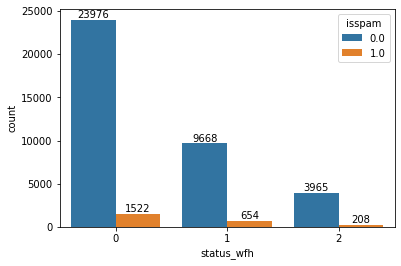

In [105]:
ax = sns.countplot(x='status_wfh', hue='isspam', data=df)
for container in ax.containers:
    ax.bar_label(container)

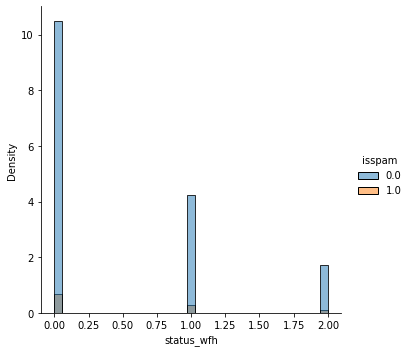

In [106]:
# sns.displot(df, x='status_wfh', hue='isspam', multiple='stack')
sns.displot(df, x='status_wfh', hue='isspam', stat="density")

Berdasarkan grafik batang di atas, terlihat bahwa input spam mayoritas dilakukan oleh pegawai dengan status_wfh=1 (work from home), namun demikian, dari sisi persentase jumlah masing-masing status, persentase kedua kelas (spam=1 dan ham=0) cukup seimbang sbb:  
* Pegawai dengan status wfo = 1522 spam : 23976 ham atau 6,35%
* Pegawai dengan status wfh = 654 spam : 9668 ham atau 6.76%
* Pegawai dengan status dinas = 208 spam : 3965 ham atau 4.98%

Ini menunjukkan `tidak terdapat korelasi signifikan antara input spam dengan status wfh/wfo/dl pegawai`. Hal ini juga dibuktikan dari hasil uji korelasi spearman antara `status_wfh` dan `isspam` yang cukup rendah yaitu **-0.003574**

In [107]:
correlation=df.corr(method='spearman')
correlation

,isspam,status_wfh,panjang_kata,punct_count,jumlah_huruf,PRS,SRS
isspam,1.000000,-0.003574,-0.334051,-0.085303,-0.348996,-0.070486,-0.110123
status_wfh,-0.003574,1.000000,0.043023,0.024734,0.031975,0.023537,0.043306
panjang_kata,-0.334051,0.043023,1.000000,0.496409,0.967060,0.425606,0.486897
punct_count,-0.085303,0.024734,0.496409,1.000000,0.494279,0.984789,0.224398
jumlah_huruf,-0.348996,0.031975,0.967060,0.494279,1.000000,0.426075,0.432587
PRS,-0.070486,0.023537,0.425606,0.984789,0.426075,1.000000,0.190381
SRS,-0.110123,0.043306,0.486897,0.224398,0.432587,0.190381,1.000000


#### Korelasi antara panjang karakter dan input spam

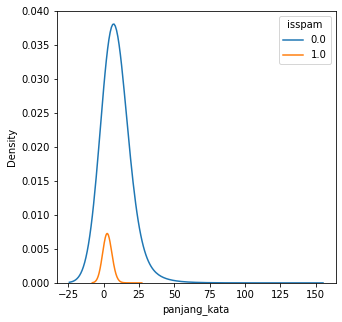

In [108]:
plt.figure(figsize=(5,5))
sns.kdeplot(data=df,x='panjang_kata',hue='isspam', bw_adjust=10)
plt.show()

Berdasarkan grafik di atas, terlihat jelas bahwa dari sisi panjang kata, kelas 1 yaitu input spam cenderung memasukkan karakter jauh lebih singkat daripada ham/non-spam. Hal ini juga didukung dengan hasil uji korelasi spearman di atas dengan hasil moderat dengan arah negatif yaitu **-0.333037**  

Dapat disimpulkan bahwa terdapat hubungan berbanding terbalik antara panjang karakter yang dituliskan pegawai terhadap kemungkinan input data spam, dimana `semakin pendek karakter, semakin besar kemungkinan input laporan kegiatan merupakan spam`  

#### Korelasi antara punct

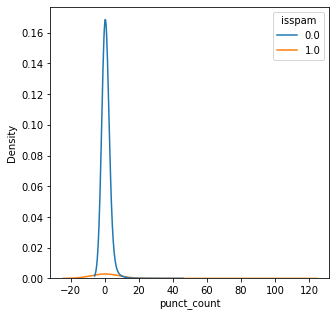

In [109]:
plt.figure(figsize=(5,5))
sns.kdeplot(data=df,x='punct_count',hue='isspam', bw_adjust=10)
plt.show()

Untuk jumlah tanda baca dapat disimpulkan bahwa tidak terdapat hubungan antara jumlah tanda baca yang dituliskan pegawai terhadap kemungkinan input data spam.

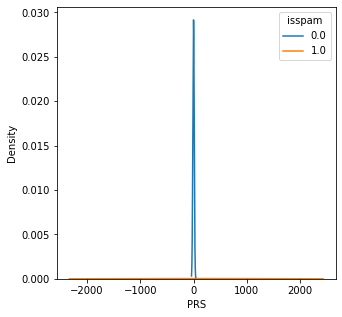

In [110]:
plt.figure(figsize=(5,5))
sns.kdeplot(data=df,x='PRS',hue='isspam',bw_adjust=1000)
plt.show()

Untuk rasio tanda baca terhadap input laporan harian, dapat disimpulkan bahwa tidak terdapat hubungan antara rasio tanda baca terhadap input laporan yang dituliskan pegawai terhadap kemungkinan input data spam.

#### Korelasi antara stopwords

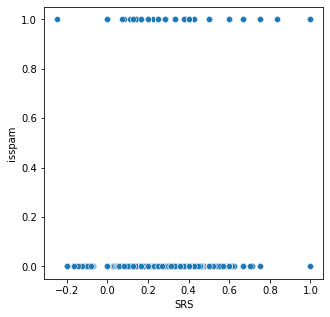

In [111]:
plt.figure(figsize=(5,5))
# sns.kdeplot(data=df,x='SRS',hue='isspam',bw_adjust=10)
# plt.show()
sns.scatterplot(data=df,x='SRS',y='isspam')
plt.show()

Untuk rasio tanda baca terhadap input laporan harian, dapat disimpulkan bahwa tidak terdapat hubungan antara rasio tanda baca terhadap input laporan yang dituliskan pegawai terhadap kemungkinan input data spam.

#### Kata-kata apa saja yang paling sering muncul?

Untuk mengetahui kata-kata yang sering muncul pada laporan harian, digunakan stemmer dengan library Sastrawi (bentuk dasar kata bahasa Indonesia)

In [112]:
check = df['aktivitas_harian'].str.extractall('([a-zA-Z]+)')
check.columns=['check']
b=check.reset_index(drop=True)
check=b['check'].value_counts().reset_index()
check=check.rename(columns={'index':'word','check':'freq'})
kamus_akt = check.set_index('word')

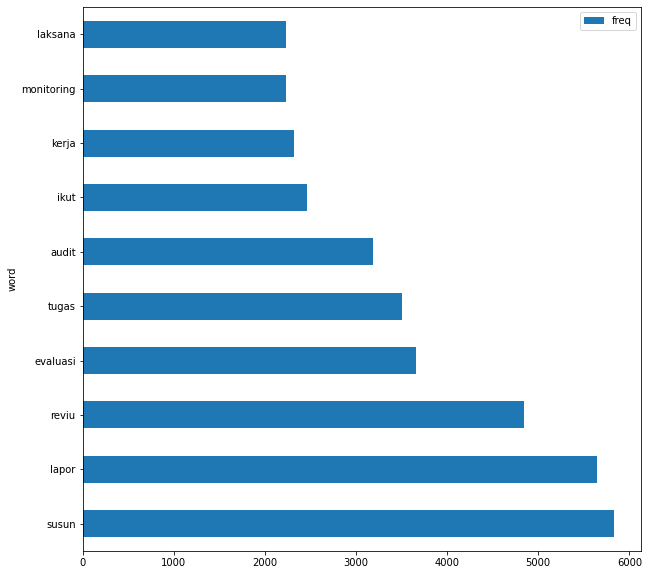

In [113]:
kamus_akt[:10].plot(kind='barh',figsize=(10,10))
plt.show()

Berdasarkan grafik batang di atas, 10 kata yang paling sering muncul dalam aktivitas harian pegawai BPKP adalah:
1. Susun
2. Lapor
3. Reviu
4. Evaluasi
5. Tugas
6. Audit
7. Ikut
8. Kerja
9. Monitoring
10. Laksana

#### Wordcloud

In [114]:
#library WordCloud
from wordcloud import WordCloud

In [115]:
# Function untuk membuat wordcloud
def plot_wordcloud(wordcloud):
    plt.figure(figsize=(10,10))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

**1. Kata yang terbanyak muncul untuk seluruh kelas**

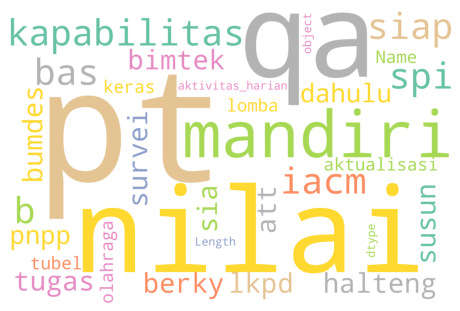

In [116]:
plt.figure(figsize=(8,8))
plt.imshow(WordCloud(width=3000,height=2000,
                       random_state=1, background_color='white',
                       colormap='Set2',collocations=False).generate(str(df['aktivitas_harian'])))
plt.axis('off')
plt.show()

**2. Kata yang terbanyak muncul untuk kelas 0 (ham)**

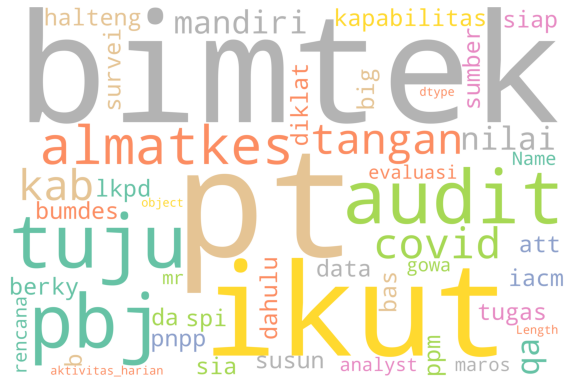

In [117]:
word_cloud = WordCloud(width=3000,height=2000,
                       random_state=1, background_color='white',
                       colormap='Set2',collocations=False
                       ).generate(str(df['aktivitas_harian'][df['isspam']==0]))
plot_wordcloud(word_cloud)

**3. Kata yang terbanyak muncul untuk kelas 1 (spam)**

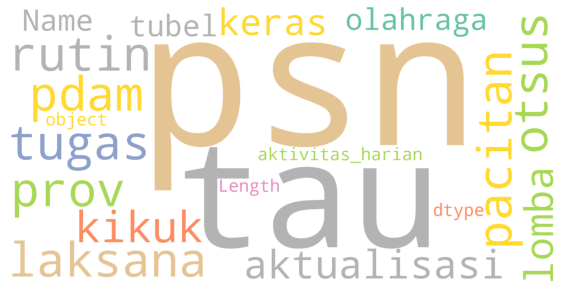

In [118]:
word_cloud = WordCloud(width=2000,height=1000,
                       random_state=1, background_color='white',
                       colormap='Set2',collocations=False).generate(str(df['aktivitas_harian'][df['isspam']==1]))
plot_wordcloud(word_cloud)

Berdasarkan grafik batang di atas, terlihat bahwa input spam mayoritas dilakukan oleh pegawai dengan status_wfh=1 (work from home), namun demikian, dari sisi persentase jumlah masing-masing status, persentase kedua kelas (spam=1 dan ham=0) cukup seimbang sbb:  
* Pegawai dengan status wfo = 1525 spam : 23978 ham atau 5.98%
* Pegawai dengan status wfh = 654 spam : 9670 ham atau 6.33%
* Pegawai dengan status dinas = 208 spam : 3965 ham atau 4.98%

Ini menunjukkan `tidak terdapat korelasi signifikan antara input spam dengan status wfh/wfo/dl pegawai`. Hal ini juga dibuktikan dari hasil uji korelasi spearman antara `status_wfh` dan `isspam` yang cukup rendah yaitu **-0.003796**

## Methodology (Machine Learning)

Terdapat 3 model yang dicoba pada dataset ini yaitu:
* Decision Tree
* XGB Classifier  
* Logistic Regression
Dari beberapa model di atas, ditemukan bahwa nilai metric terbaik adalah dari model **`XGB Classifier`**

### Import Library

In [119]:
# library untuk model

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# library untuk model selection
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, cross_validate,RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score, PrecisionRecallDisplay, roc_auc_score,confusion_matrix,plot_roc_curve,roc_curve,plot_precision_recall_curve

### Splitting data

In [120]:
# splitting data
x_train,x_test, y_train, y_test = train_test_split(x,y, stratify=y, random_state=2022)
display(x_train, y_train)

,aktivitas_harian,status_wfh,panjang_kata,punct_count,PRS,SRS
9049,dulu koordinasi kejar basel,2,4,0,0.0,0.000000
3981,rapat pmu starmenyusun lapor kick off meeting,0,8,0,0.0,0.125000
5609,isi lampir lapor monitoring insentif nakes tau ii,0,8,0,0.0,0.000000
1524,ppm iepk sibijak,0,4,0,0.0,0.250000
8911,att tagih pln wisma atlet,1,5,0,0.0,0.000000
...,...,...,...,...,...,...
16910,selesai lapbul bidang,1,3,0,0.0,0.000000
52386,ikut zoom meeting kait isi sa sakip,1,7,0,0.0,0.000000
50388,susun lapkin tau iii bidang apd,0,6,0,0.0,0.000000
337,ekspose pt ab ppm pbj,0,7,0,0.0,0.285714


9049     0.0
3981     0.0
5609     0.0
1524     0.0
8911     0.0
        ... 
16910    0.0
52386    0.0
50388    0.0
337      0.0
48170    0.0
Name: isspam, Length: 29994, dtype: float64

### Membuat vector dari kolom aktivitas harian
Untuk mengubah fitur text pada kolom `aktivitas harian` menjadi representasi vector yang dapat diolah menjadi model, digunakan tools `TF-IDF` dan untuk menjadikannya `feature` berbasis kolom, digunakan function `hstack`

**Sebelumnya tim juga mencoba menggunakan `countvectorizer`, namun, setelah mempertimbangkan beberapa hal, `TF-IDF` dipilih menjadi basis pembuatan vector**  

*Mengapa TF-IDF yang dipilih?*  

Beberapa alasannya:
* CountVectorizer hanya berfokus pada perhitungan seberapa sering sebuah kata muncul di dalam dokumen (menggunakan hyperparameter max_features) yang menghasilkan bias.Pada akhirnya, kata-kata langka atau jargon-jargon spesifik dunia pengawasan yang bermunculan di BPKP dan bisa membantu memproses data lebih efisien sering terabaikan.
* Untuk mengatasi kekurangan di atas, vectorizer TF-IDF digunakan. TF-IDF mempertimbangkan bobot dokumen keseluruhan dari sebuah kata.
* TF-IDF terdiri dari 2 bagian yaitu TF (Term Frequency) dikalikan dengan IDF (Inverse Document Frequency). Gagasan utamanya adalah menemukan seberapa sering sebuah kata muncul dalam 1 dokumen dan lebih jarang di dokumen lain. Hal ini memberikan wawasan tambahan untuk 1 dokumen tersebut dan dapat membantu model belajar dari informasi tambahan ini.

#### Count Vectorizer (Tidak digunakan)

In [121]:
# vect=CountVectorizer(ngram_range=(1,5)).fit(x_train['aktivitas_harian'])
# x_train2=vect.transform(x_train['aktivitas_harian'])
# x_test2=vect.transform(x_test['aktivitas_harian'])

# x_train2

#### Menggunakan TF-IDF

In [122]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [123]:
tf_idf=TfidfVectorizer(ngram_range=(1,5)).fit(x_train['aktivitas_harian'])
x_train2=tf_idf.transform(x_train['aktivitas_harian'])
x_test2=tf_idf.transform(x_test['aktivitas_harian'])

In [124]:
from scipy.sparse import hstack
wordcount = x_train['panjang_kata'].values[:, None]
statuswfh = x_train['status_wfh'].values[:, None]
punct_count = x_train['punct_count'].values[:, None]
punct_ratio = x_train['PRS'].values[:, None]
stopword_ratio = x_train['SRS'].values[:, None]

x_train2 = hstack((x_train2, wordcount,statuswfh,punct_count,punct_ratio,stopword_ratio))

In [125]:
from scipy.sparse import hstack
wordcount = x_test['panjang_kata'].values[:, None]
statuswfh = x_test['status_wfh'].values[:, None]
punct_count = x_test['punct_count'].values[:, None]
punct_ratio = x_test['PRS'].values[:, None]
stopword_ratio = x_test['SRS'].values[:, None]

x_test2 = hstack((x_test2, wordcount,statuswfh,punct_count,punct_ratio,stopword_ratio))

#### Cross Validation  
Untuk mengevaluasi kinerja model yang digunakan, dilakukan Cross Validation. Data dibagi menjadi dua subset untuk learning dan validation. Cross Validation dilakukan karena dapat mengurangi waktu komputasi dengan tetap menjaga keakuratan estimasi.

In [126]:
# membuat fungsi untuk melakukan cross validation
def model_evaluation_cv(model, metric):
    return cross_validate(model,x_train2,y_train,cv=3,scoring=metric)

model_xgb = XGBClassifier(random_state=2022,max_depth=5)
model_evaluation_cv(model_xgb,['roc_auc','average_precision'])

{'fit_time': array([2.04526711, 1.97786713, 1.98782611]),
 'score_time': array([0.06258678, 0.03782606, 0.03339386]),
 'test_roc_auc': array([0.96366982, 0.96278691, 0.96706131]),
 'test_average_precision': array([0.70406243, 0.69886593, 0.71485883])}

In [127]:
def model_evaluation_cv(model, metric):
    return cross_validate(model,x_train2,y_train,cv=3,scoring=metric)

model_tree = DecisionTreeClassifier(random_state=2022,max_depth=500)
model_lr = LogisticRegression(random_state=2022)
#model_rf = RandomForestClassifier(random_state=2022, n_estimators=10, max_depth=100)
model_xgb = XGBClassifier(random_state=2022,max_depth=50)

models= [['tree',model_tree],
        ['lr',model_lr],
        ['xgb',model_xgb]] 

rerata_fit_time=[]
rerata_score_time=[]
rerata_f1=[]
std_f1=[]
rerata_precision=[]
std_precision=[]
rerata_recall=[]
std_recall=[]
rerata_roc=[]
std_roc=[]
rerata_ap=[]
std_ap=[]
for i in models:
    cv_results = model_evaluation_cv(i[1],('f1','precision','recall','roc_auc','average_precision'))
    rerata_fit_time.append(cv_results['fit_time'].mean())
    rerata_score_time.append(cv_results['score_time'].mean())
    rerata_f1.append(cv_results['test_f1'].mean())
    std_f1.append(cv_results['test_f1'].std())
    rerata_precision.append(cv_results['test_precision'].mean())
    std_precision.append(cv_results['test_precision'].std())
    rerata_recall.append(cv_results['test_recall'].mean())
    std_recall.append(cv_results['test_recall'].std())
    rerata_roc.append(cv_results['test_roc_auc'].mean())
    std_roc.append(cv_results['test_roc_auc'].std())
    rerata_ap.append(cv_results['test_average_precision'].mean())
    std_ap.append(cv_results['test_average_precision'].std())


pd.DataFrame({'fit_time_mean':rerata_fit_time,
              'score_time_mean':rerata_score_time,
              'f1_mean':rerata_f1,
              'f1_std':std_f1,
              'precision_mean':rerata_precision,
              'precision_std':std_precision,
              'recall_mean':rerata_recall,
              'recall_std':std_recall,
              'roc_auc_mean':rerata_roc,
              'roc_auc_std':std_roc,
              'avg_prec_mean':rerata_ap,
              'avg_prec_std':std_ap}, index=[i[0] for i in models])

# average precision

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

,fit_time_mean,score_time_mean,f1_mean,f1_std,precision_mean,precision_std,recall_mean,recall_std,roc_auc_mean,roc_auc_std,avg_prec_mean,avg_prec_std
tree,13.340567,0.023728,0.605815,0.028790,0.669158,0.022958,0.557047,0.053076,0.774706,0.022933,0.405137,0.025815
lr,3.150737,0.016785,0.475684,0.021377,0.855692,0.030049,0.329418,0.016054,0.949682,0.002406,0.680464,0.013567
xgb,17.879109,0.122314,0.655702,0.001383,0.721220,0.010237,0.601230,0.004811,0.964080,0.002563,0.724392,0.007352


**Base Model yang Terpilih, menggunakan model_xgb karena scorenya lebih besar dari model lain**

In [128]:
model_xgb.fit(x_train2,y_train)
model_xgb.get_xgb_params()

{'objective': 'binary:logistic',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'eval_metric': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 50,
 'max_leaves': 0,
 'min_child_weight': 1,
 'monotone_constraints': '()',
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 2022,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

### Menggunakan Resampling untuk Data Imbalance

Resampling digunakan untuk data imbalance di mana data yang digunakan memiliki jumlah yang jauh berbeda pada setiap klasifikasinya. Tetapi perlu diketahui bahwa dengan melakukan resampling juga dapat membuat data menjadi underfitting atau overfitting (karena terlalu condong ke mayoritas). Telah dilakukan beberapa Resampling yaitu menggunakan SMOTE dan RandomUnderSampler. Dari hasil mean_test_score, std_test_score, dan rank_test_score, dapat diambil kesimpulan bahwa hasil tanpa Resampling lebih baik untuk memprediksi data.

In [129]:
# imbalance classification under & oversampling
from imblearn.under_sampling import RandomUnderSampler, NearMiss, CondensedNearestNeighbour
from imblearn.over_sampling import SMOTE, RandomOverSampler

from sklearn.metrics import roc_auc_score, plot_roc_curve, roc_curve, f1_score
from imblearn.pipeline import Pipeline #kalau pakai resampling method, gunakan pipeline dari library imblearn

In [130]:
# uji menggunakan resampling
smote = SMOTE(random_state=2022)
rus= RandomUnderSampler(random_state=2022) 
model_xgb = XGBClassifier(random_state=2022,max_depth=50)
estimator=Pipeline([
    ('resample', None),
    ('model', model_xgb)
])

hyperparam_space={'resample':[None,smote,rus],
                  'model__max_depth': [40,50,100],
                  'model__learning_rate':[0.300000012,0.5,0.01]}
rdm_search=RandomizedSearchCV(estimator,
                         param_distributions=hyperparam_space,
                         cv=3,
                         random_state=2022,
                         scoring='f1',
                         n_iter = 5)

In [131]:
rdm_search.fit(x_train2,y_train)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('resample', None),
                                             ('model',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            early_stopping_rounds=None,
                                                            enable_categorical=False,
                                                            eval_metric=None,
                                                            gamma=None,
                                                            gpu_id=None,
                                                            grow_policy=None,
                                                            importance_type=None,
                                                            interaction_constr...
                                                            monotone_constraints=None,
                                                            n_estimators=100,
                                                            n_jobs=None,
                                                            num_parallel_tree=None,
                                                            predictor=None,
                                                            random_state=2022,
                                                            reg_alpha=None,
                                                            reg_lambda=None, ...))]),
                   n_iter=5,
                   param_distributions={'model__learning_rate': [0.300000012,
                                                                 0.5, 0.01],
                                        'model__max_depth': [40, 50, 100],
                                        'resample': [None,
                                                     SMOTE(random_state=2022),
                                                     RandomUnderSampler(random_state=2022)]},
                   random_state=2022, scoring='f1')

In [132]:
pd.DataFrame(rdm_search.cv_results_)[['params','mean_test_score','std_test_score','rank_test_score']]

,params,mean_test_score,std_test_score,rank_test_score
0,"{'resample': SMOTE(random_state=2022), 'model_...",0.627934,0.008875,2
1,"{'resample': None, 'model__max_depth': 100, 'm...",0.646412,0.004978,1
2,"{'resample': SMOTE(random_state=2022), 'model_...",0.625397,0.007712,3
3,{'resample': RandomUnderSampler(random_state=2...,0.406951,0.009321,5
4,"{'resample': SMOTE(random_state=2022), 'model_...",0.610751,0.005913,4


In [133]:
print(rdm_search.best_score_)
print(rdm_search.best_params_)

0.6464120567294408
{'resample': None, 'model__max_depth': 100, 'model__learning_rate': 0.5}


## Hyperparameter Tuning

Dapat dibuktikan dengan classification report, bahwa model tanpa tuning berdasarkan best parameter lebih baik hasilnya untuk memprediksi.

In [134]:
# Before tuning
model_xgb = XGBClassifier(random_state=2022,max_depth=50)
model_xgb.fit(x_train2,y_train) #benchmark 1
print(classification_report(y_test,model_xgb.predict(x_test2)))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      9403
         1.0       0.69      0.66      0.67       596

    accuracy                           0.96      9999
   macro avg       0.83      0.82      0.83      9999
weighted avg       0.96      0.96      0.96      9999



In [135]:
# After tuning
best_model=rdm_search.best_estimator_
best_model.fit(x_train2,y_train)
print(classification_report(y_test,best_model.predict(x_test2)))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      9403
         1.0       0.66      0.65      0.65       596

    accuracy                           0.96      9999
   macro avg       0.82      0.81      0.82      9999
weighted avg       0.96      0.96      0.96      9999



In [136]:
# Prediction results
pred_results = pd.DataFrame({'x_test':x_test['aktivitas_harian'],
               'y_test':y_test,
               'y_pred_proba':model_xgb.predict_proba(x_test2)[:,1],
               'y_pred':model_xgb.predict(x_test2)
               }).reset_index()
pred_results

,index,x_test,y_test,y_pred_proba,y_pred
0,1542,laksana nilai angka kredit auditor ikut webina...,0.0,0.000004,0
1,58485,jam pimpin kantor,1.0,0.970892,1
2,54533,coaching clinic susun lapor keungan aplikasi s...,0.0,0.000019,0
3,52976,konsultasi bismart,0.0,0.549478,1
4,45055,reviu lapor laksana ppm triwulan iii,0.0,0.000006,0
...,...,...,...,...,...
9994,11203,lembur rangka rencana rehabilitasi ruang deput...,0.0,0.000748,0
9995,16364,audit lapor uang pamsimas iii desember kabupat...,0.0,0.000002,0
9996,42606,selesai lapor audit pajak pt gsi berita acara ...,0.0,0.000003,0
9997,56905,entry meeting st monitoring pengin kemenpar,0.0,0.000074,0


## Visualisasi Hasil Prediksi

Setelah melakukan pemodelan di atas, dilakukan pengetesan pada y_pred_proba (prediction probability) untuk melihat apakah model machine learning berbasis XGBoost yang dipilih oleh tim dapat membedakan data spam dan ham dengan cukup baik, namun masih terdapat banyak klasifikasi spam dan ham yang tercampur di bagian tengah. dari predict probability dapat kita mainkan thresholdnya dan bisa menaikan nilai recall tetapi ada kemungkinan akan mengurangi nilai precision.

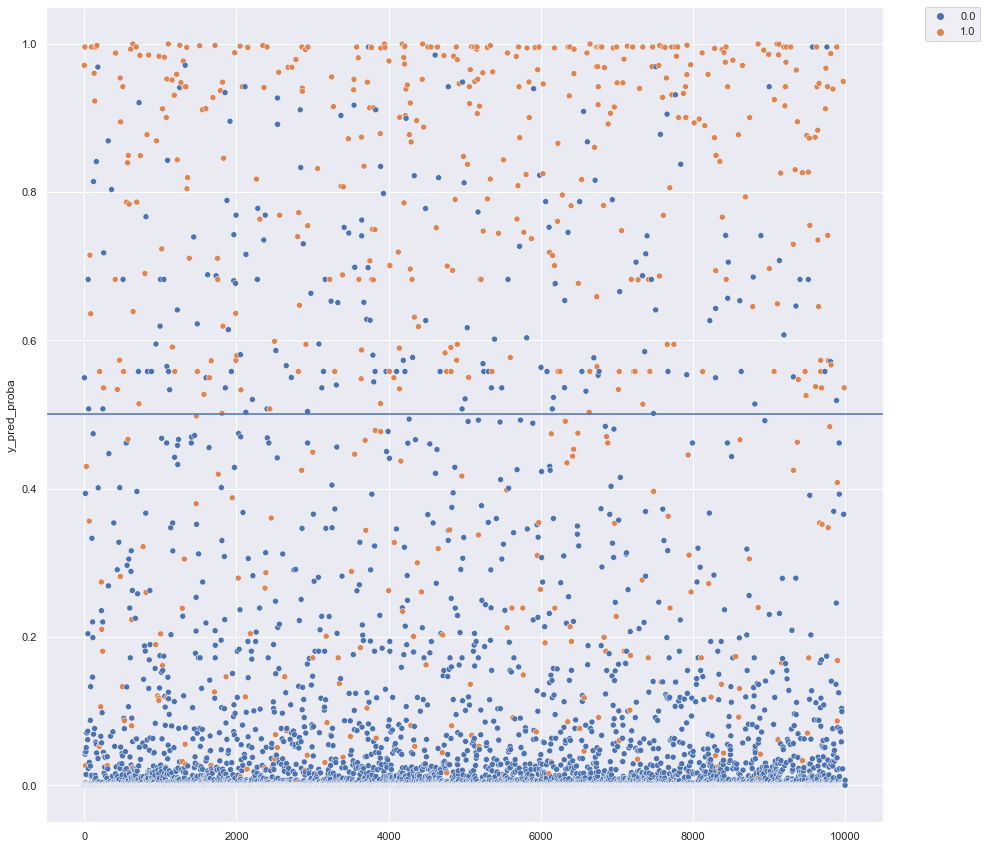

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt

graph = sns.scatterplot(data=pred_results, x=pred_results.index, y='y_pred_proba', hue='y_test')
graph.axhline(0.5)
sns.set(rc={"figure.figsize":(15, 15)})
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [138]:
pred_results.loc[pred_results['y_test']!=pred_results['y_pred']]

,index,x_test,y_test,y_pred_proba,y_pred
3,52976,konsultasi bismart,0.0,0.549478,1
18,18001,konsep lhr bsu,1.0,0.026696,0
29,58239,fb meeting,1.0,0.429843,0
31,48675,ppm diskusi,1.0,0.001880,0
51,19613,penandatanganan pakta,0.0,0.682128,1
...,...,...,...,...,...
9806,14413,entry pp p,0.0,0.571294,1
9885,9175,baseline spip,0.0,0.518807,1
9894,11119,lapor ehkp bulog,1.0,0.086601,0
9895,56781,vaksin tahap iii,1.0,0.408161,0


Dari scatterplot di atas, dapat dilihat bahwa secara kasar, dengan menggunakan threshold 0.5, model telah dapat membedakan data spam dan ham, meskipun masih belum sempurna. Apabila treshold dikurangi, kemungkinan data spam dapat difilter dengan lebih baik. Namun, hal tersebut berpotensi menyebabkan type I error yang lebih besar juga. Menaikkan recall namun mengurangi presisi.

## Membuat function percobaan model

Tim melakukan pengetesan untuk melihat apakah model machine learning yang dibuat dapat membedakan input spam dan ham dengan baik. Untuk itu, dibuat aplikasi sederhana sebagai berikut.

In [139]:
def input_preprocessing(data_input):
    data_input['strip_tags'] = data_input['nama_aktivitas'].apply(strip_tags)
    data_input['length'] = data_input['strip_tags'].apply(countword)
    data_input['punct_count'] = data_input['strip_tags'].apply(count_punct)
    data_input['len'] = data_input['strip_tags'].apply(len)
    data_input['punct_ratio'] = 1-((data_input['len'] - data_input['punct_count'])/data_input['len'])
    data_input['aktivitas_harian'] = data_input['strip_tags'].apply(teks_prep)
    data_input['aktivitas_harian']= data_input['aktivitas_harian'].apply(stem)
    data_input['nett_length'] = data_input['aktivitas_harian'].apply(countword)
    data_input['stopword_ratio'] = (data_input['length'] - data_input['nett_length'])/data_input['length']
    data_input['stopword_ratio'] = data_input['stopword_ratio'].fillna(0)
    return data_input    

def spam_identifier(data_input):
    input_cleaned = input_preprocessing(data_input)

    input_matrix = tf_idf.transform(input_cleaned['aktivitas_harian'])
    wordcount = list(np.int64(input_cleaned['length'].values[:, None]))
    statuswfh = list(np.int64(input_cleaned['status_wfh'].values[:, None]))
    punct_count = list(np.int64(input_cleaned['punct_count'].values[:, None]))
    punct_ratio = list(np.int64(input_cleaned['punct_ratio'].values[:, None]))
    stopword_ratio = list(np.int64(input_cleaned['stopword_ratio'].values[:, None]))
    input_matrix = hstack((input_matrix, wordcount,statuswfh,punct_count,punct_ratio,stopword_ratio))

    predict_results = model_xgb.predict(input_matrix)[0]

    if predict_results == 0:
        print('inputan anda adalah valid')
    elif predict_results == 1:
        print('inputan anda adalah spam')
    else:
        print('error')

In [140]:
status_wfh = input('masukkan 0 untuk wfo, 1 untuk wfh, 2 untuk DL')
nama_aktivitas = input('masukkan aktivitas harian')

data_input = pd.DataFrame({'nama_aktivitas':nama_aktivitas,
                           'status_wfh':status_wfh},index=[0])

spam_identifier(data_input)

inputan anda adalah spam


## **Kesimpulan dan Saran**

### Kesimpulan
1. Secara umum, model berbasis XGBoost yang dibuat telah dapat membedakan input spam dan ham, namun seperti yang terlihat pada grafik prediction probabilty, pembagian antara SPAM dan HAM belum sempurna
2. Score Recall dan F1 model XGBoost yang dihasilkan adalah 0.66 dan 0.67, di mana menjelaskan bahwa dari 10 input yang masuk, sebanyak 6-7 input akan masuk ke klasifikasi yang benar

### Keterbatasan penelitian
1. Proses tagging data termasuk dalam kategori spam/ham dilakukan secara manual oleh tim sehingga terdapat kemungkinan terjadi kesalahan maupun bias pada tag spam/ham.
2. Terdapat singkatan-singkatan yang mungkin lazim di lingkungan auditor tetapi tidak teridentifikasi oleh peneliti sehingga tidak dapat diubah/diseragamkan untuk memaksimalkan proses modeling.
3. Terbatasnya kemampuan komputasi perangkat mengakibatkan sedikitnya model maupun hyperparameter yang diuji untuk mendapatkan model yang optimal. 

### Saran untuk analisis lanjutan
1. Proses tagging agar dilakukan oleh pihak yang lebih berkompeten seperti atasan langsung pegawai sehingga dapat lebih pasti dalam membedakan sebuah inputan tergolong spam atau ham.
2. Agar dibuat sebuah kamus yang berisi daftar singkatan-singkatan yang lazim di lingkungan auditor beserta kepanjangannya yang dapat digunakan untuk memaksimalkan proses training model.
3. Agar dilakukan pengembangan fitur menggunakan algoritma lain Part of Speech (POS) Tagging untuk mengidentifikasi jenis kata.
4. Agar digunakan model yang lebih kompleks dan holistik seperti deep learning untuk meningkatkan performa model.
5. Agar dilakukan tuning lanjutan pada hyperparameter yang digunakan mengingat hyperparameter tuning yang dilakukan dalam penelitian ini masih sangat terbatas.
6. Agar dilakukan penambahan data labeling SPAM dan HAM untuk meningkatkan akurasi prediksi, dengan ketentuan pelabelan yang lebih terstruktur atau terarah.
7. Agar mencoba menambahkan fitur dengan mengkaitkan aktivitas harian dan Sasaran Kinerja Pegawai/Surat Tugas.
8. Agar saat melakukan preprocessing, data scientist melakukannya dengan lebih  mendetail/berkali-kali agar data frame yang diperoleh lebih akurat.  



Hormat kami,  

Tim Delta.